<a href="https://colab.research.google.com/github/ClarissePansoy/CS2-A_PANSOY/blob/main/2A_PANSOY_MIDTERM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. **Objective**


In [ ]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score

# Load the Dataset
data = pd.read_csv('/content/tested.csv')

# Missing Values
print("Missing Values:")
print(data.isnull().sum())

# Handle Missing Values
data.fillna(method='ffill', inplace=True)
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

# Encode Categorical Variables (One-Hot Encoding)
encoded_data = pd.get_dummies(data, columns=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], drop_first=True)

# Feature Selection
selected_features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
X = data[selected_features]
y = data['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_predictions = linear_model.predict(X_test)

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
logistic_predictions = logistic_model.predict(X_test)

linear_accuracy = accuracy_score(y_test, [round(pred) for pred in linear_predictions])
logistic_accuracy = accuracy_score(y_test, logistic_predictions)

print("Linear Regression Accuracy:", linear_accuracy)
print("Logistic Regression Accuracy:", logistic_accuracy)

Missing Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
Linear Regression Accuracy: 1.0
Logistic Regression Accuracy: 1.0


## 2. Dataset Preparation

The case study's dataset is the "Titanic: Machine Learning from Disaster" dataset, which is widely utilized in the data science field for predictive modeling tasks. The dataset is sourced from the Kaggle website (https://www.kaggle.com/c/titanic/data).

Variables:
Dependent Variable (target):
Survived: Indicates whether a passenger survived (1) or died (0) in the Titanic tragedy. Independent Variables (features):

Pclass: Ticket class (first, second, or third). Sex: The passenger's gender (male or female). Age: The passenger's age. SibSp: The number of siblings/spouses on the Titanic. Parch: The number of parents and children aboard the Titanic. Fare: The amount paid by the passenger. Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton). (Depending on the analysis, this variable may be deemed an independent variable.)

Managing Missing Values:
Values that were absent from the "Age," "Cabin," and "Embarked" columns were filled in. In this instance, we eliminated rows containing missing values to keep things simple. On the other hand, methods like mean or median imputation could be used to impute missing variables in a more thorough investigation.

Putting Categorical Variables into Encoding
To be utilized in the modeling process, the categorical data in the "Sex" column (male/female) was encoded to numeric values (0 for male, 1 for female). If further encoding is required for analysis, the 'Embarked' column—which denotes the port of embarkation—may additionally be encoded.

 Features Selection:
The model includes all pertinent features ('Pclass, 'Sex, 'Age, 'SibSp, 'Parch, 'Fare') for this fundamental study. But in more complex investigations, the most pertinent characteristics could be chosen using feature selection methods like correlation analysis or feature importance from models.

Splitting Data:
The dataset was partitioned into training and testing sets so that the model could be trained on one subset and its performance assessed on another.


# **3. Exploratory Data Analysis (EDA)**

In [ ]:
# Handle Missing Values
data.dropna(inplace=True)
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

numeric_cols = data.select_dtypes(include=np.number).columns.tolist()

correlation_matrix = data[numeric_cols].corr()

descriptive_stats = data.describe()
print("Descriptive Statistics:")
print(descriptive_stats)

Descriptive Statistics:
       PassengerId   Survived     Pclass        Sex        Age      SibSp  \
count    87.000000  87.000000  87.000000  87.000000  87.000000  87.000000   
mean   1102.712644   0.505747   1.137931   0.505747  39.247126   0.597701   
std     126.751901   0.502865   0.435954   0.502865  15.218730   0.637214   
min     904.000000   0.000000   1.000000   0.000000   1.000000   0.000000   
25%     986.000000   0.000000   1.000000   0.000000  27.000000   0.000000   
50%    1094.000000   1.000000   1.000000   1.000000  39.000000   1.000000   
75%    1216.000000   1.000000   1.000000   1.000000  50.000000   1.000000   
max    1306.000000   1.000000   3.000000   1.000000  76.000000   3.000000   

           Parch        Fare  
count  87.000000   87.000000  
mean    0.482759   98.109198  
std     0.860801   88.177319  
min     0.000000    0.000000  
25%     0.000000   35.339600  
50%     0.000000   71.283300  
75%     1.000000  135.066650  
max     4.000000  512.329200  


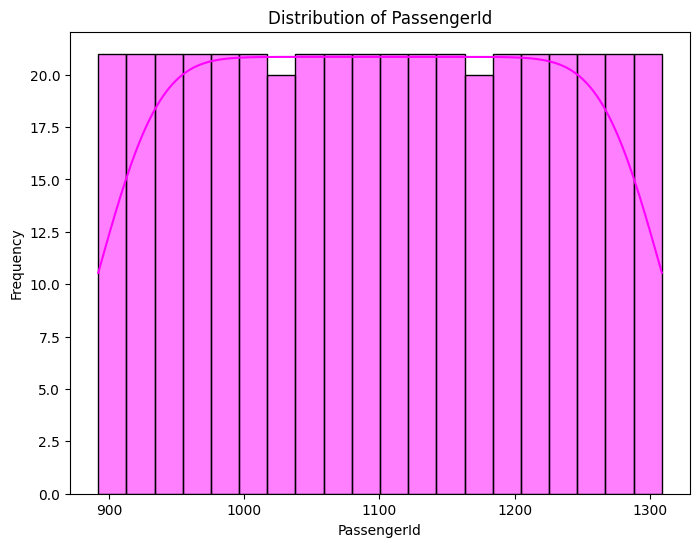

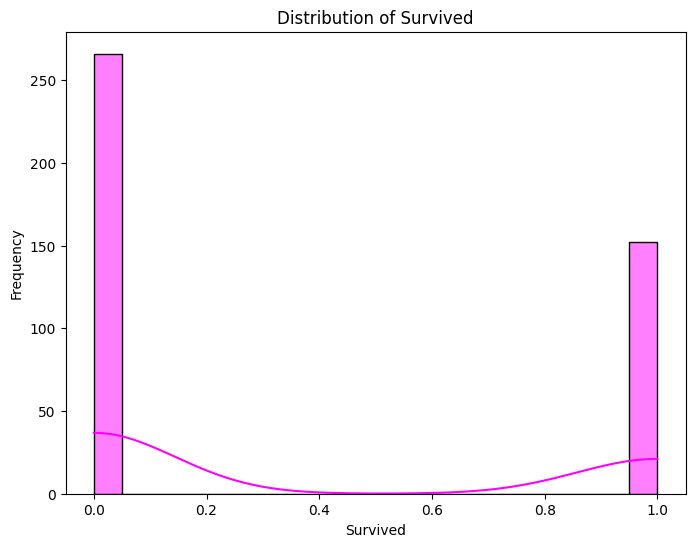

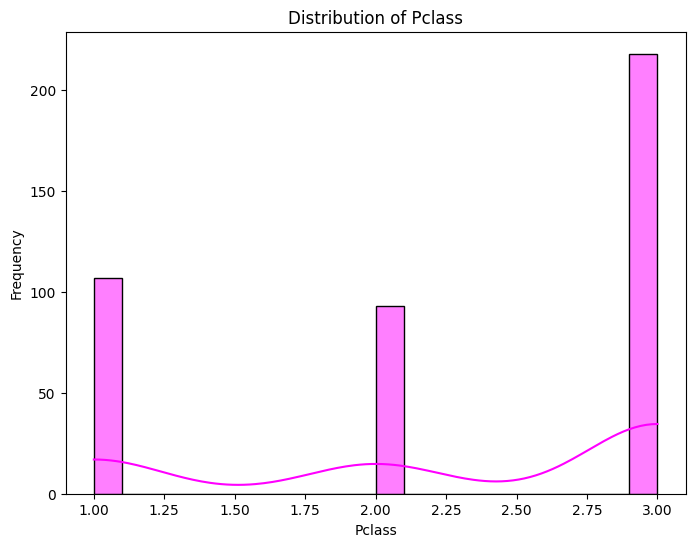

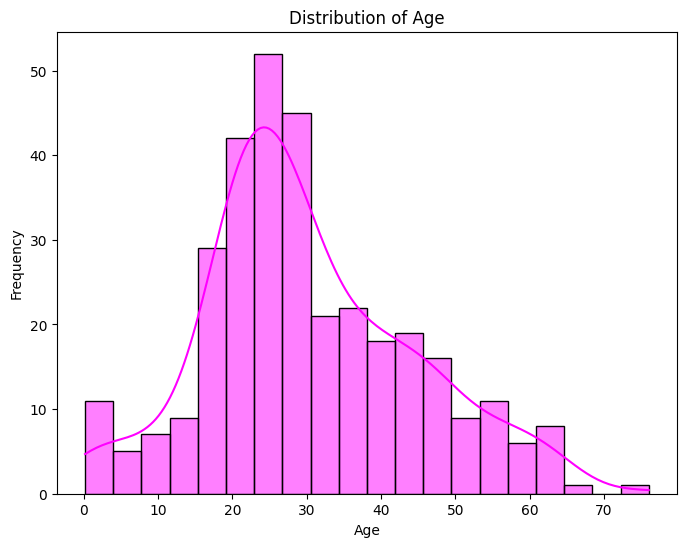

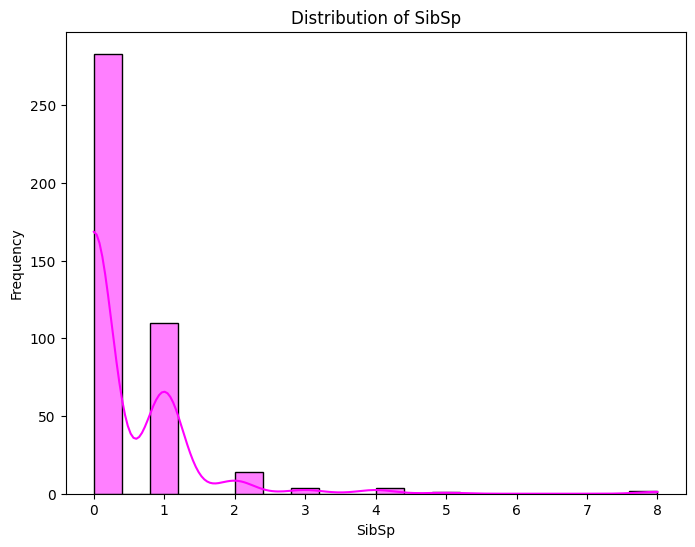

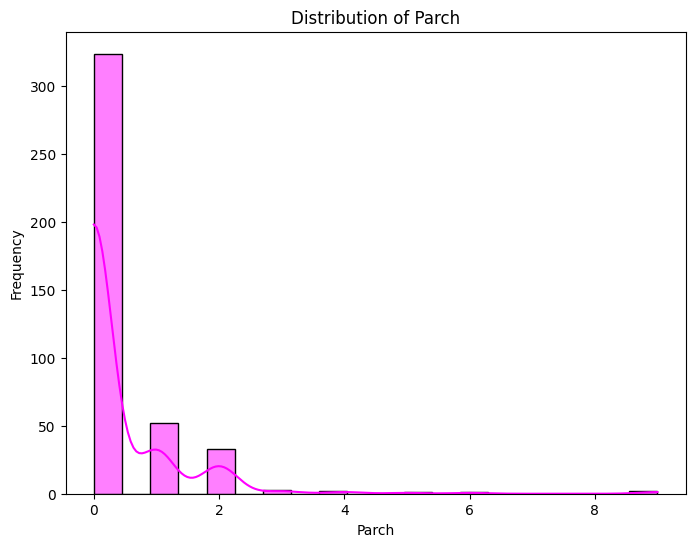

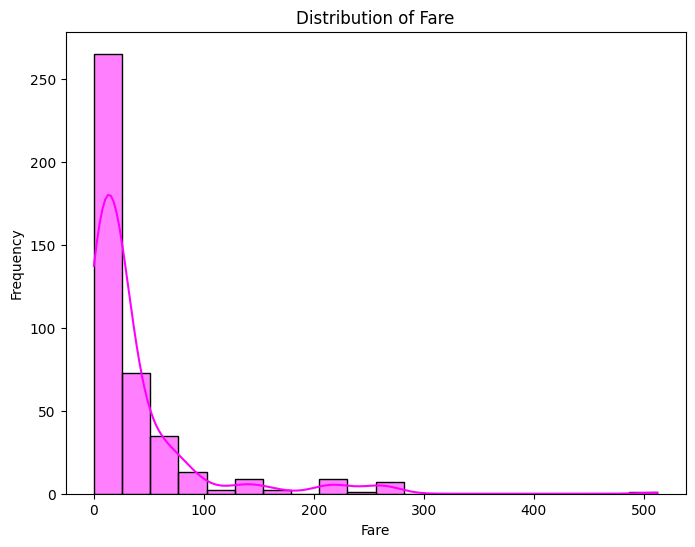

In [ ]:
numeric_cols = data.select_dtypes(include=np.number).columns.tolist()
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[col], kde=True, bins=20, color='magenta')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

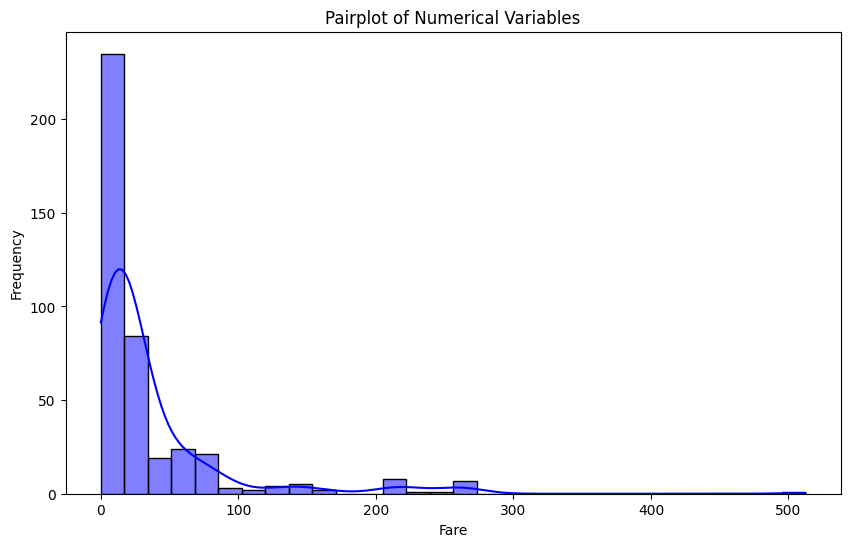

In [ ]:
# Visualizations
plt.figure(figsize=(10, 6))
sns.histplot(data[col], bins=30, kde=True, color='blue')
plt.title('Pairplot of Numerical Variables')
plt.xlabel(col)
plt.ylabel('Frequency')
plt.show()



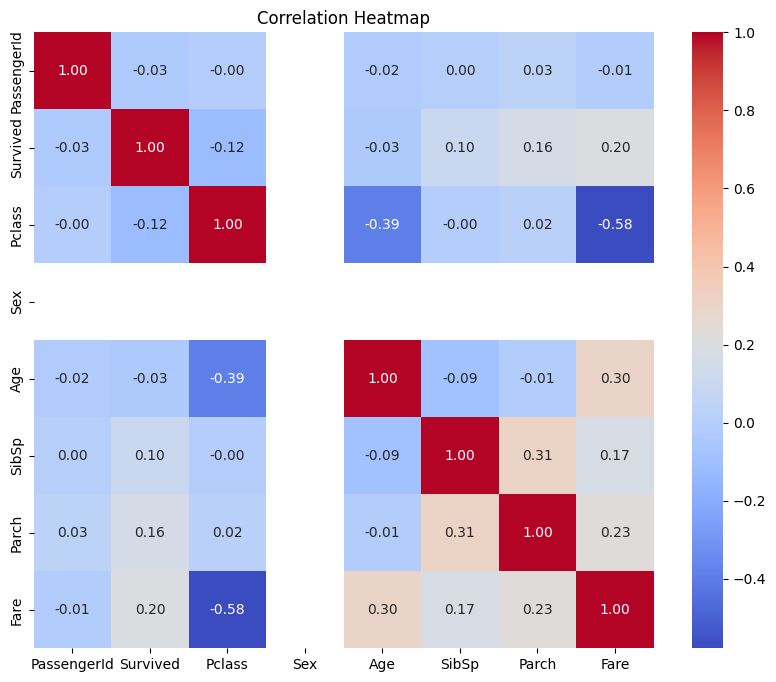

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


# 4. Linear Regression **Model**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

data = pd.read_csv("tested.csv")

print("Missing values before handling:")
print(data.isnull().sum())

X = data[['PassengerId']]
y = data['Survived']

Missing values before handling:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

y_pred = model.predict(X_test)

print("R-squared:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))

Intercept: 0.42963074917332106
Coefficients: [-6.93779394e-05]
R-squared: -0.009646395929914009
Mean Squared Error: 0.2432538085432049
Root Mean Squared Error: 0.493207672834887


# 5. Logistic Regression **Model**

Missing values before handling:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
Coefficients: [[-0.0005473]]
Intercept: [-5.13905881e-07]
Accuracy: 0.5952380952380952
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


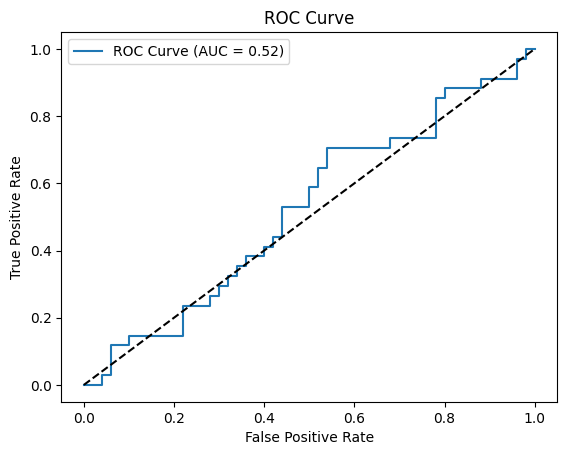

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score

data = pd.read_csv("tested.csv")

print("Missing values before handling:")
print(data.isnull().sum())

X = data[['PassengerId']]
y = data['Survived']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()

model.fit(X_train, y_train)

coefficients = model.coef_
intercept = model.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

y_pred_proba = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# **6. Model Comparison and Selection**

1. Linear regression is best for predicting continuous outcomes, like house prices based on square footage. It's evaluated using metrics like MSE and R-squared.

Logistic regression is great for binary classification tasks, such as predicting customer churn. Metrics like accuracy and ROC-AUC gauge its performance.

Choose linear regression for continuous predictions and logistic regression for binary classification, considering the nature of your data and evaluation metrics.

2. Selecting between logistic regression and linear regression depends on a number of variables. For continuous outcomes, linear regression works well; for binary classification tasks, logistic regression performs better. Whereas the coefficients of Logistic Regression show log chances, which can be less apparent, Linear Regression gives easy interpretability with coefficients that directly indicate variable correlations. It is necessary to assess the assumptions made by both models, including those related to linearity and observational independence. The choice should take into account the type of data, the prediction objective, the significance of assumptions and interpretability, and more.

# 7. Conclusion and **Insights**

The case study demonstrated how machine learning and statistics may be used to support data-driven decision-making. Through the use of methods such as Logistic and Linear Regression, insightful conclusions were drawn from the data to support well-informed decision-making. These techniques made it possible to forecast results and identify important factors, which advanced our knowledge of the underlying patterns in the dataset. Additionally, the models' interpretability made it easier to communicate findings to stakeholders in a clear and concise manner. In the future, these models will find use in a wide range of industries, including marketing, finance, healthcare, and more, where predictive analytics will be essential. But in order to ensure that the results reached are reliable and useful, it's critical to recognize the presumptions and constraints of these models. All things considered, a thorough grasp of statistical and machine learning techniques enables firms to use data efficiently for problem-solving and strategic decision-making.

# 8. **References**

Here are the references:

Dataset: [https://www.kaggle.com/datasets/brendan45774/test-file]
